[Reference](https://medium.com/better-programming/every-python-programmer-should-know-lru-cache-from-the-standard-library-8e6c20c6bc49)

In [7]:
from functools import lru_cache
from datetime import datetime

@lru_cache(maxsize=None)
def fib_cache(n):
  if n < 2:
    return n
  return fib_cache(n-1) + fib_cache(n-2)

def fib_no_cache(n):
  if n < 2:
    return n
  return fib_no_cache(n-1) + fib_no_cache(n-2)  

def timeit(func, samples):
  start = datetime.now()
  func(samples)
  end = datetime.now()
  return end-start

In [8]:
UPPER = 40

cached = []
for i in range(0, UPPER):
  cached.append(timeit(fib_cache,i))

not_cached = []
for i in range(0, UPPER):
  not_cached.append(timeit(fib_no_cache,i)) 

Text(0.5, 0, 'samples')

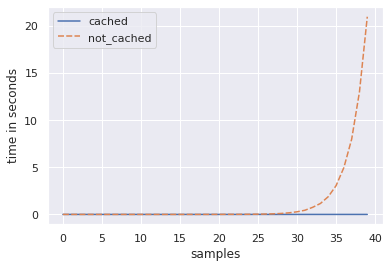

In [9]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame([cached,not_cached]).T
df.columns = ['cached','not_cached']
df = df.applymap(lambda x: x.value/1000000000)

sns.set()
g = sns.lineplot(data = df)
g.set_ylabel('time in seconds')
g.set_xlabel('samples')

In [10]:
df.head()

,cached,not_cached
0,0.000012,0.000002
1,0.000002,0.000001
2,0.000052,0.000001
3,0.000002,0.000001
4,0.000001,0.000003
